In [2]:
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Problem Statement

This project is the gentle introduction of Price Elasticity of Demand Analysis with Regression Analysis to estimate Price Elasticity of Demand(PED).

In marketing, it is important to measure how sensitive consumers are to a change in price of a product. The marketing managers must give answers to below questions such as:

1. “If I lower the price of a product, how much more will sell?”
2. “If I raise the price of one product, how will that affect sales of the other products?”
3. “If the market price of a product goes down, how much will that affect the amount that firms will be willing to supply to the market?
We need to measure the percentage change in quantity demanded in response to a one percent change in price.

Here, Price elasticity of demand is a measure we will use to show the elasticity of the quantity demanded of a good to a change in its price when nothing but the price changes.

We will conduct data exploration and build a linear regression to estimate PED. Let’s get started!

# Data source

We will work with the beef price and demand data

In [3]:
beef = pd.read_csv('beef.csv')

In [5]:
beef.head(10)

Year  Quarter  Quantity     Price
0  1977        1   22.9976  142.1667
1  1977        2   22.6131  143.9333
2  1977        3   23.4054  146.5000
3  1977        4   22.7401  150.8000
4  1978        1   22.0441  160.0000
5  1978        2   21.7602  182.5333
6  1978        3   21.6064  186.2000
7  1978        4   21.8814  186.4333
8  1979        1   20.5086  211.7000
9  1979        2   19.0408  231.5000

In [6]:
beef.isnull().sum()

Year        0
Quarter     0
Quantity    0
Price       0
dtype: int64

# Modelling

## Regression Analysis

### Ordinary Least Squares (OLS) Estimation

In [15]:
beef_model = ols("Quantity ~ Price", data=beef).fit()

In [16]:
print(beef_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Fri, 31 Aug 2018   Prob (F-statistic):           1.69e-46
Time:                        23:00:04   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

Observations:

The small P values indicate that we can reject the null hypothesis that Price has no effect on Quantity.

Hight r squared indicates that our model explains a lot of the response variability.

In regression analysis, we'd like our regression model to have significant variables and to produce a high R-squared value.

We will show graphs to help interpret regression analysis results more intuitively.

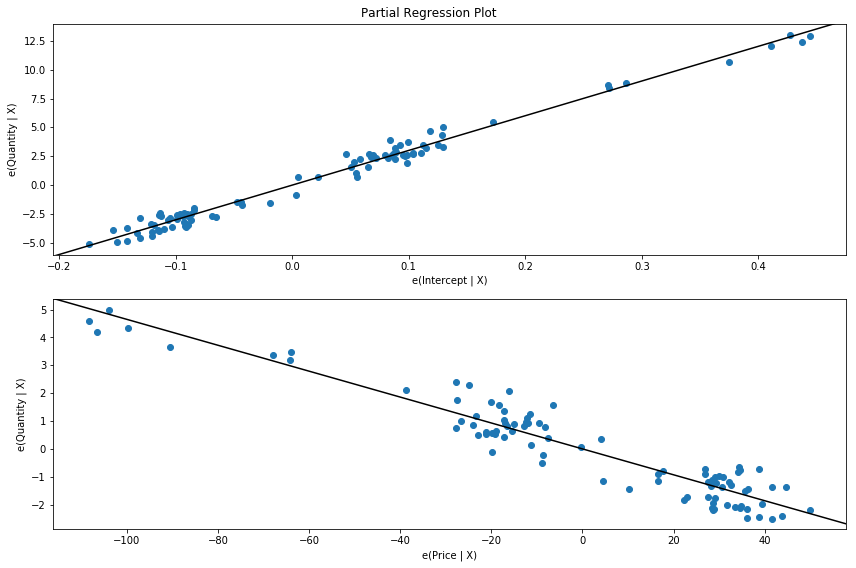

In [17]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(beef_model, fig=fig)

The trend indicates that the predictor variables (Price) provides information about the response (Quantity), and data points do not fall further from the regression line, and the predictions are very precise given a prediction interval that extends from about 29 to 31.

### Component-Component plus Residual (CCPR) Plots

The CCPR plot provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables.

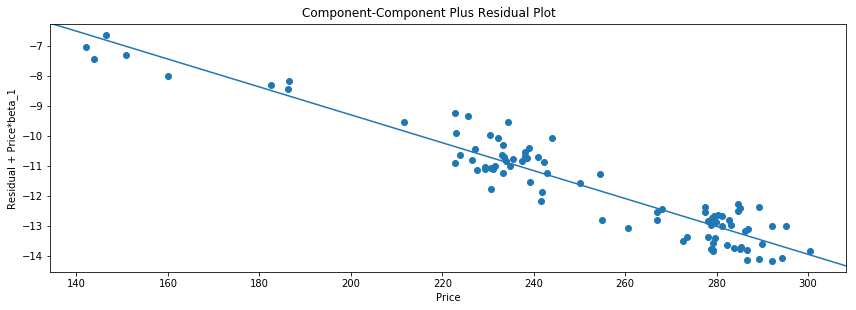

In [18]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(beef_model, fig=fig)

As you can see the relationship between the variation in Quantity explained by Price is definite linear. There are not many observations that are exerting considerable influence on the relationships.

### Regression plots

We use plot_regress_exog function to quickly check model assumptions with respect to a single regressor, Price in our case.

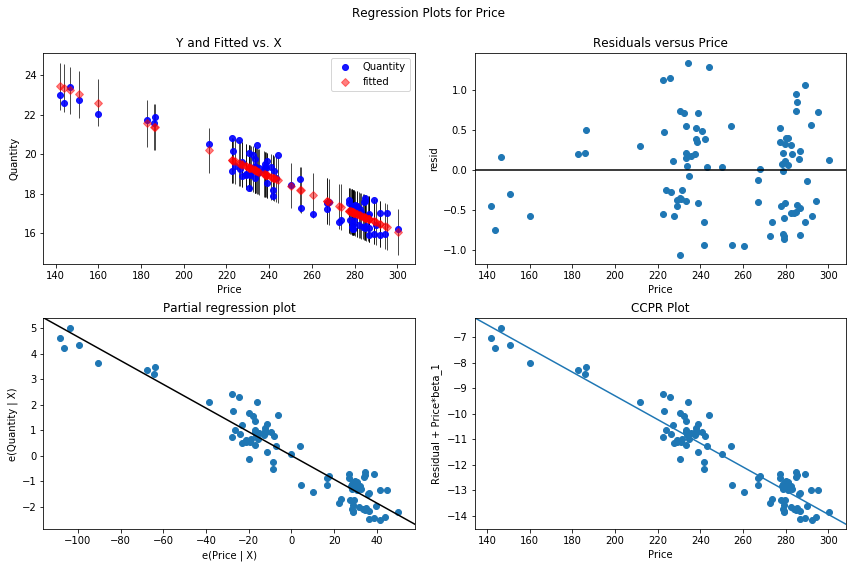

In [19]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(beef_model, 'Price', fig=fig)

### Recursive Least Square (RLS)

Finally we apply Recursive Least Square (RLS) filter to investigate parameter instability.

Before RLS estimation, we will manipulate the data and create a date time index.

In [25]:
beef['Year'] = pd.to_datetime(beef['Year'], format="%Y")

In [26]:
beef.head()

Year  Quarter  Quantity     Price
0 1977-01-01        1   22.9976  142.1667
1 1977-01-01        2   22.6131  143.9333
2 1977-01-01        3   23.4054  146.5000
3 1977-01-01        4   22.7401  150.8000
4 1978-01-01        1   22.0441  160.0000

In [28]:
from pandas.tseries.offsets import *
beef['Date'] = beef.apply(lambda x:(x['Year'] + BQuarterBegin(x['Quarter'])), axis=1)

In [30]:
beef.drop(['Year', 'Quarter'], axis=1, inplace=True)

In [33]:
beef.set_index('Date', inplace=True)

In [34]:
beef.head(10)

Quantity     Price
Date                          
1977-03-01   22.9976  142.1667
1977-06-01   22.6131  143.9333
1977-09-01   23.4054  146.5000
1977-12-01   22.7401  150.8000
1978-03-01   22.0441  160.0000
1978-06-01   21.7602  182.5333
1978-09-01   21.6064  186.2000
1978-12-01   21.8814  186.4333
1979-03-01   20.5086  211.7000
1979-06-01   19.0408  231.5000

In [36]:
endog = beef['Quantity']

# To the regressors in the dataset, we add a column of ones for an intercept
exog = sm.add_constant(beef['Price'])

### RLS estimation

In [37]:
mod = sm.RecursiveLS(endog, exog)
res = mod.fit()

print(res.summary())

                           Statespace Model Results                           
Dep. Variable:               Quantity   No. Observations:                   91
Model:                    RecursiveLS   Log Likelihood                 -84.326
Date:                Fri, 31 Aug 2018   AIC                            172.653
Time:                        23:38:41   BIC                            177.675
Sample:                    03-01-1977   HQIC                           174.679
                         - 09-01-1999                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0515      0.413     72.700      0.000      29.241      30.862
Price         -0.0465      0.002    -28.482      0.000      -0.050      -0.043
Ljung-Box (Q):                      422.30   Jarque-

The RLS model computes the regression parameters recursively, so there are as many estimates as there are datapoints, the summary table only presents the regression parameters estimated on the entire sample; these estimates are equivalent to OLS estimates.

### RLS plots

We can generate the recursively estimated coefficients plot on a given variable.

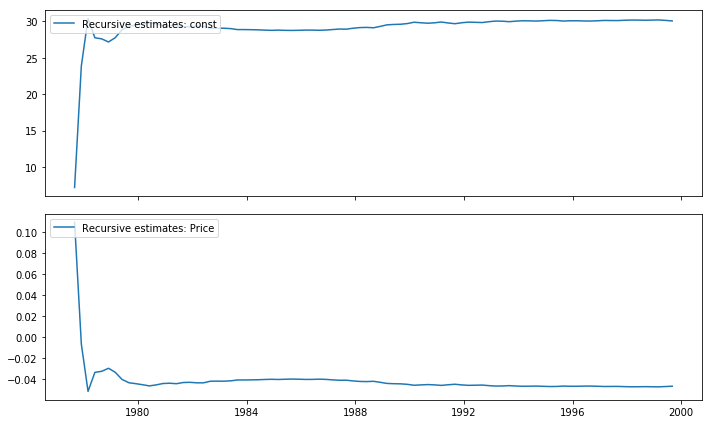

In [38]:
res.plot_recursive_coefficient(range(mod.k_exog), alpha=None, figsize=(10,6));

For convenience, we visually check for parameter stability using the plot_cusum function.

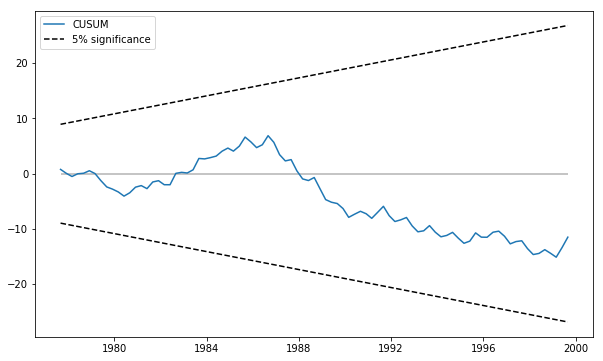

In [39]:
fig = res.plot_cusum(figsize=(10,6));

In the plot above, the CUSUM statistic does not move outside of the 5% significance bands, so we fail to reject the null hypothesis of stable parameters at the 5% level.

# Conclusion

In this notebook, we provide a measurement on how sensitive consumers are to a change in price of a product. We found out that the elasticity of the quantity demanded of a good to a change in its price when nothing but the price changes.

For Price Elasticity of Demand Analysis with Regression Analysis, we can the rate feature to r